<a href="https://colab.research.google.com/github/mattiadido95/Haze-Fog-suppression/blob/main/dataset_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import os
import gdown
import zipfile
import cv2
import numpy as np

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
folder_path = "drive/MyDrive/Haze-Fog-suppression"
os.chdir(folder_path)

# Uncompress Zip files


In [ ]:
os.chdir("dataset")
current_directory = os.getcwd()

#estrae tutti i file zip e cancella il file compresso
for file_name in os.listdir(current_directory):
    if file_name.endswith(".zip"):
        path_to_zip_file = os.path.join(current_directory, file_name)
        with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
            zip_ref.extractall(current_directory)
        os.remove(path_to_zip_file)

# Generate datasets

In [86]:
# Specifica i parametri
# Valore di luce atmosferica (generalmente tra 0 e 255)
low_A = 100
medium_A = 140
high_A = 180

low_beta = 0.004
medium_beta = 0.006
high_beta = 0.008

path_to_original_image = "/content/drive/MyDrive/Haze-Fog-suppression/dataset/Vis/00006.png"
path_to_depth_map = "/content/drive/MyDrive/Haze-Fog-suppression/dataset/DepthMaps/00006.png"

In [93]:
#`d` sia l'immagine di profondità e `thresholds` sia una lista di tre soglie
def compute_transmission_map(d):
    H = d.shape[0]
    W = d.shape[1]
    vector = d.reshape(H * W * 3)
    for pixel_value in vector:
      if pixel_value < 50:
        pixel_value = 0
      elif pixel_value > 50 and pixel_value < 87:
        pixel_value = 50
      elif pixel_value > 87 and pixel_value < 167:
        pixel_value = 87
      elif pixel_value > 167 and pixel_value < 209:
        pixel_value = 167
      else:
        pixel_value = 255
    normalized = vector.reshape(H, W, 3).astype(np.uint8)
    t = np.exp(-high_beta * normalized)
    return t

In [102]:
def compute_cevr(original,degradeted):
  return (max(original) - min(original)) / (max(degradeted) - min(degradeted))

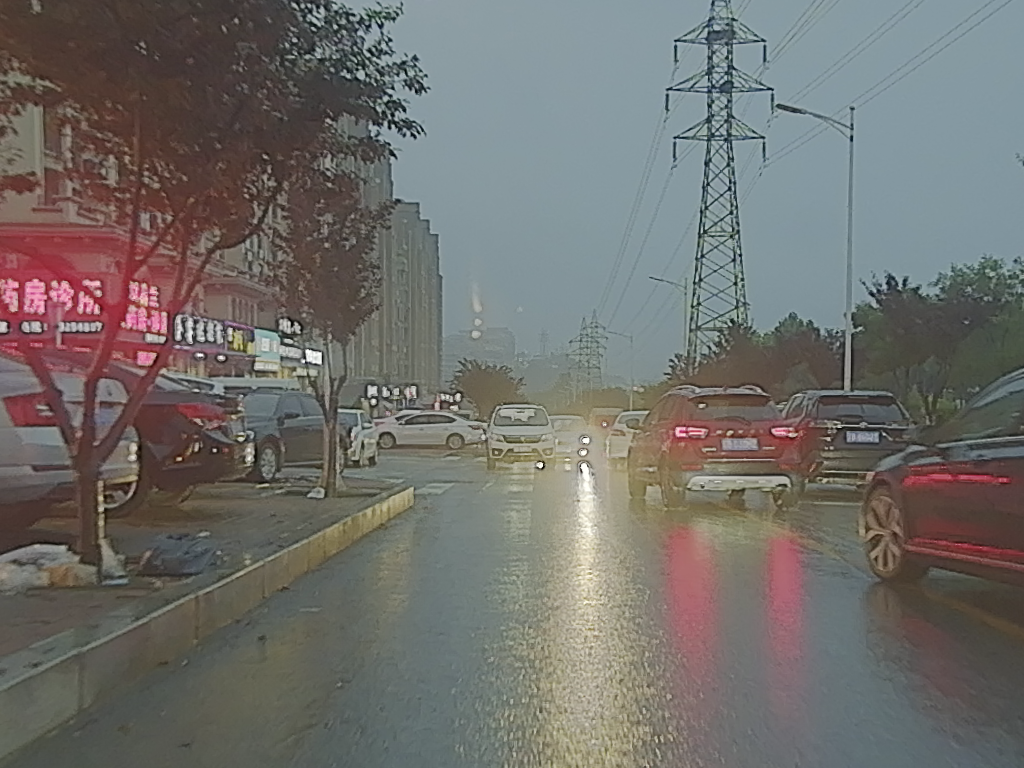

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



---------------Cevr metrics----------------
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-103-bea49638bb3c>", line 18, in <cell line: 18>
    compute_cevr(J,I_low)
  File "<ipython-input-102-4a58229e9d0c>", line 2, in compute_cevr
    return (max(original) - min(original)) / (max(degradeted) - min(degradeted))
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most

In [ ]:
# Carica l'immagine originale e la mappa di transizione
J = cv2.imread(path_to_original_image)
d = cv2.imread(path_to_depth_map)

#Calcola la mappa di transizione
t_low = np.exp(-low_beta * d)
t_medium = np.exp(-medium_beta * d)
t_high = np.exp(-high_beta * d)

# Calcola l'immagine degradata con effetto nebbia
I_low = J * t_low + low_A * (1 - t_low)
I_medium = J * t_medium + medium_A * (1 - t_medium)
I_high = J * t_high + high_A * (1 - t_high)

# Visualizza l'immagine originaria
cv2_imshow(J)
print("---------------Cevr metrics----------------")
compute_cevr(J,I_low)
compute_cevr(J,I_medium)
compute_cevr(J,I_high)

# Salva e visualizza l'immagine degradata su disco
cv2.imwrite('low_fog.jpg', np.uint8(I_low))
cv2.imwrite('medium_fog.jpg', np.uint8(I_medium))
cv2.imwrite('high_fog.jpg', np.uint8(I_high))

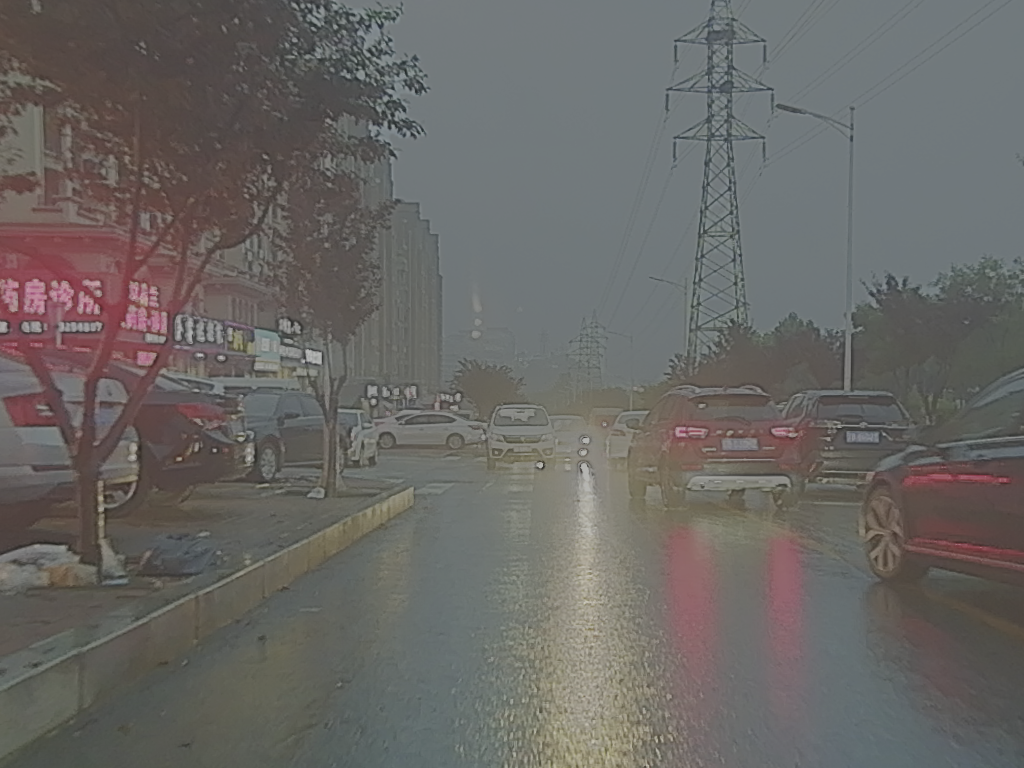

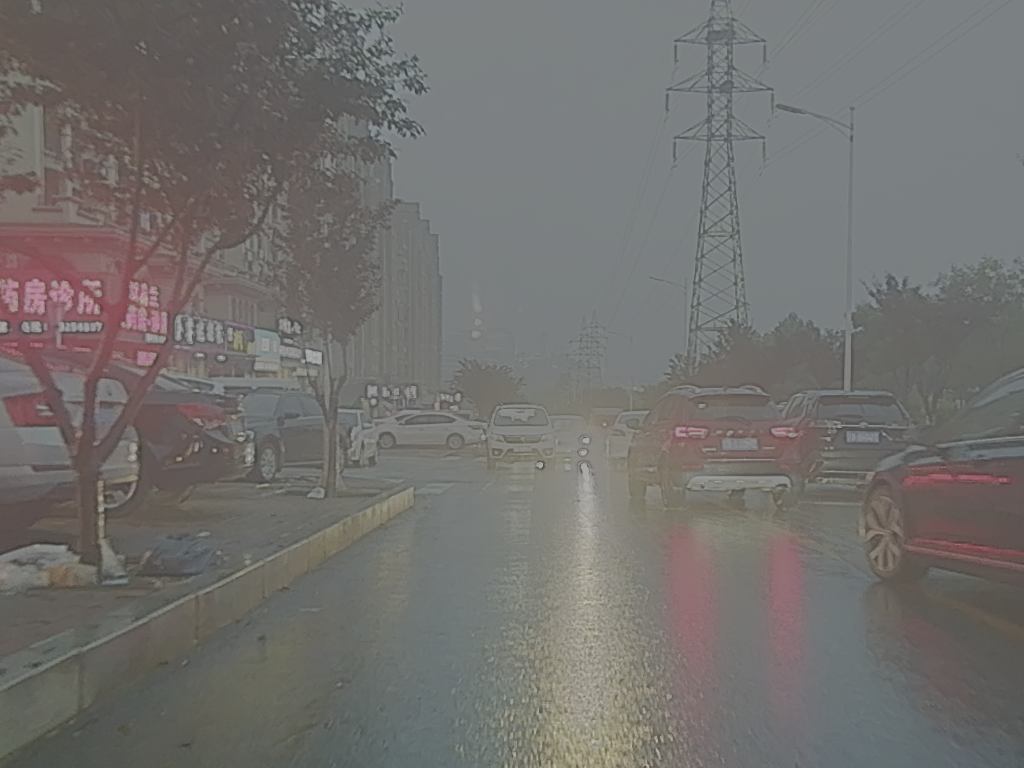

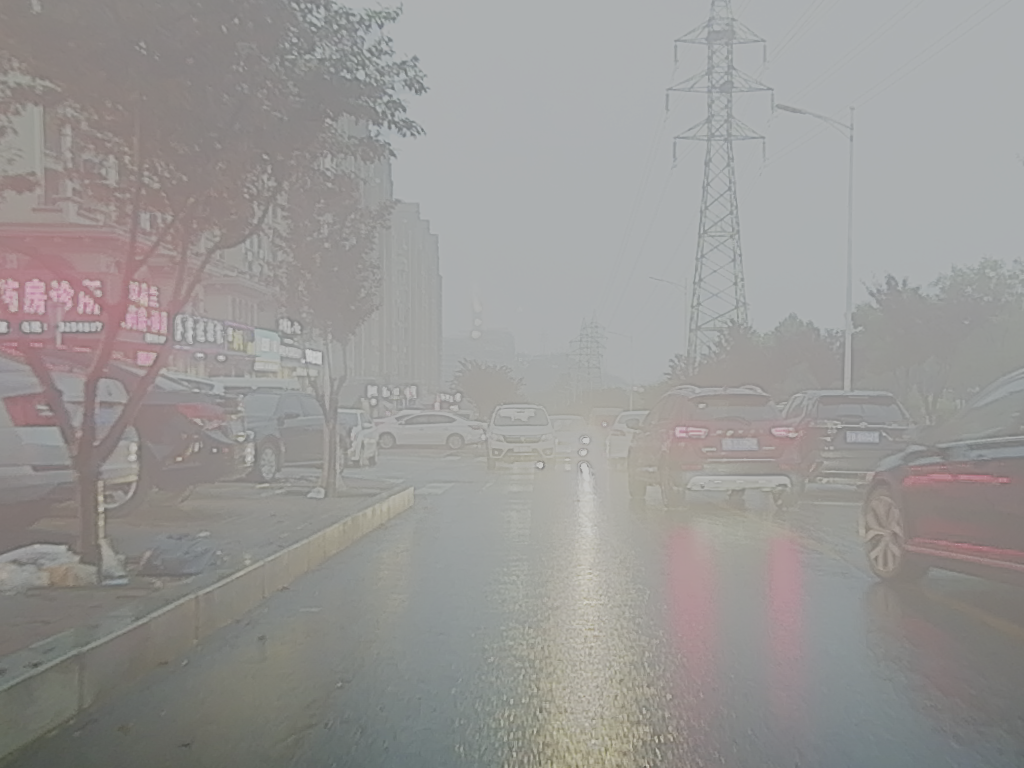

In [101]:
cv2_imshow(I_low)
cv2_imshow(I_medium)
cv2_imshow(I_high)